## Mostafa Shahbazi , id: 40252521602

In [39]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


In [38]:
def separate_foreground_background(image_path, num_clusters=2):
    # Read the image
    image = cv2.imread(image_path)

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init=40)
    kmeans.fit(pixels)

    # Get the labels assigned to each pixel
    labels = kmeans.labels_

    # Reshape the labels to the original image shape
    segmented_image = labels.reshape(image.shape[:2])

    # Assuming foreground is the cluster with the most pixels
    foreground_label = np.argmax(np.bincount(segmented_image.flatten()))

    # Create a binary mask for the foreground
    foreground_mask = (segmented_image == foreground_label).astype(np.uint8)

    return foreground_mask

# Separate foreground and background for a.png
foreground_mask_a = separate_foreground_background("./a.png")
foreground_mask_b = separate_foreground_background("./b.png")

# accuracy of a.png
foreground_mask_a_correct = np.zeros_like(foreground_mask_a)
foreground_mask_b_correct = np.zeros_like(foreground_mask_b)

accuracy_score(foreground_mask_b.flatten(), foreground_mask_a.flatten())


0.9116934724149153

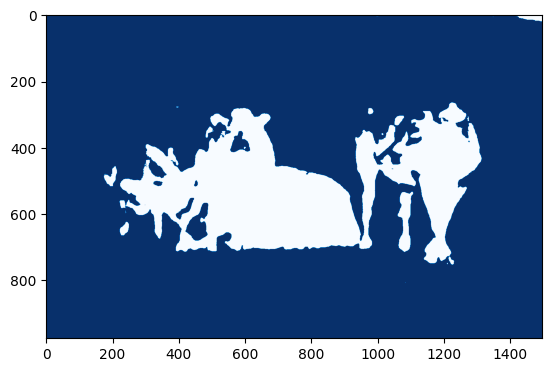

In [40]:
plt.imshow(foreground_mask_a, cmap="Blues")
plt.show()

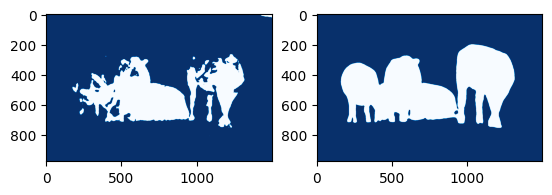

In [43]:
# show image A and image B on one plot for comparison
plt.subplot(1, 2, 1)
plt.imshow(foreground_mask_a, cmap="Blues")
plt.subplot(1, 2, 2)
plt.imshow(foreground_mask_b, cmap="Blues")
plt.show()

